<a href="https://colab.research.google.com/github/MatteoGandetto/Corso_Python_new/blob/master/Regressione_Lineare_Semplice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Import Libraries**

In [0]:
# package for scientific computing
import numpy as np

#collection of command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt 

#data analysis and manipulation tool
import pandas as pd 



---
---
**Load data into a dataFrame and prepare them**

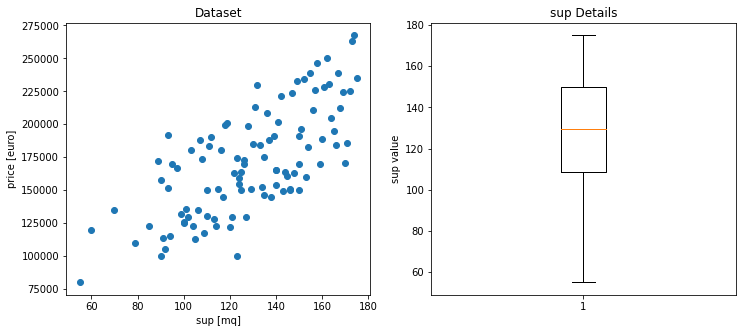

In [5]:

path='https://raw.githubusercontent.com/MatteoGandetto/Corso_Python_new/master/Regressione_Lineare_Semplice_IN.csv'
INPUT_df=pd.read_csv(path)

#remove all NaN
# 0 -> rows
# 1 -> columns
INPUT_df=INPUT_df.dropna(1,'all')
INPUT_df=INPUT_df.dropna(0,'all')

#convert to NumPy array
np_IN=np.array(INPUT_df)
np_IN_X=np_IN[:,0]
np_IN_y=np_IN[:,1]

#plot data
fig, axs = plt.subplots(1,2)
fig.set_size_inches(12,5)

axs[0].scatter(np_IN_X, np_IN_y)
axs[0].set_xlabel('sup [mq]')
axs[0].set_ylabel('price [euro]')
axs[0].set_title('Dataset')

axs[1].boxplot(np_IN_X)
axs[1].set_ylabel('sup value')
axs[1].set_title('sup Details')

fig.show()



---

---

Machine Learning
**ALGORITMO DI REGRESSIONE LINEARE**



Import Libraries

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Dataset splitting 
 

In [0]:
# split dataset in training part and test part
# if train_size and test_size are not defined,the train_size=0.75 and test_size=0.25
X_train, X_test, y_train, y_test = train_test_split(np_IN_X,np_IN_y,test_size=0.25)

**TRAINING PHASE** 

In [0]:

#reshape features to be used with LinearRegression's methods
X_train_r=np.reshape(X_train,(-1, 1))
X_test_r=np.reshape(X_test,(-1, 1))
X_all=np.reshape(np_IN_X,(-1,1))

#train the linear regressor
linear_reg = LinearRegression().fit(X_train_r, y_train)

**TEST PHASE**

In [0]:
#y_pred is a linear prediction of X_test
y_pred_test=linear_reg.predict(X_test_r)
y_pred_train=linear_reg.predict(X_train_r)
y_pred_all=linear_reg.predict(X_all)

Compute evaluation metrics and plot results

TEST
R^2= 0.526458668445933 
MSE= 947048679.958767 

TRAIN
R^2= 0.49581758383619223 
MSE= 744473947.047781 



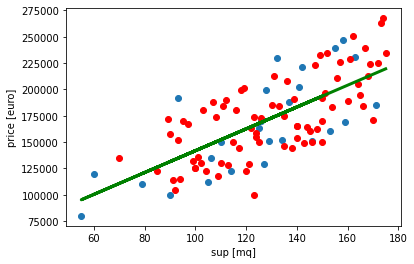

In [30]:
#evaluate the model by using R=1-RSE and MSE
R2=linear_reg.score(X_test_r,y_test)
MSE = mean_squared_error( y_test,y_pred_test)
R2_train=linear_reg.score(X_train_r,y_train)
MSE_train = mean_squared_error(y_train,y_pred_train)
print ('TEST\nR^2=',R2,'\nMSE= %f \n' % MSE)
print ('TRAIN\nR^2=',R2_train,'\nMSE= %f \n' % MSE_train)

#show the solution
fig, axs = plt.subplots(1,1)

axs.set_xlabel('sup [mq]')
axs.set_ylabel('price [euro]')
axs.scatter(X_test,y_test)
axs.scatter(X_train,y_train,color='red')
axs.plot(X_all,y_pred_all,c='green',linewidth=3)
fig.show()